import neccessary libaries

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

# Loand test and train data

In [154]:
df1=pd.read_csv("G:/Loan analytics/train.csv") #train data
df2=pd.read_csv("G:/Loan analytics/test.csv")  #test data
sub=pd.read_csv("G:/Loan analytics/sample_submission.csv")  #sample submission file

In [155]:
df1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [156]:
#will check the null values by using heatmap

<AxesSubplot:>

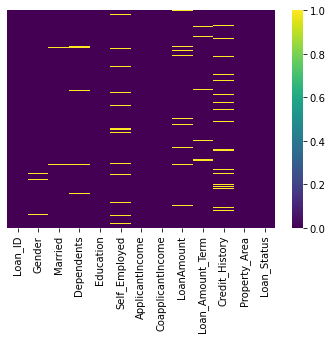

In [157]:
sns.heatmap(df1.isnull(),yticklabels=False, cmap='viridis')

<AxesSubplot:>

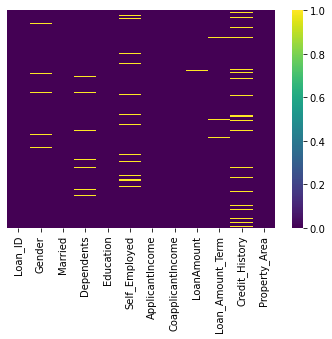

In [158]:
sns.heatmap(df2.isnull(),yticklabels=False, cmap='viridis')

In [159]:
#will check the percentage of missing values

In [160]:
#finding the missing values by applying for loop to find how many percentage of column data is missing
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values

features_with_na=[features for features in df1.columns if df1[features].isnull().sum()>1]

## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df1[feature].isnull().mean(), 4),  ' % missing values')

Gender 0.0212  % missing values
Married 0.0049  % missing values
Dependents 0.0244  % missing values
Self_Employed 0.0521  % missing values
LoanAmount 0.0358  % missing values
Loan_Amount_Term 0.0228  % missing values
Credit_History 0.0814  % missing values


In [161]:
#finding the missing values by applying for loop to find how many percentage of column data is missing
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values

features_with_na=[features for features in df2.columns if df2[features].isnull().sum()>1]

## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df2[feature].isnull().mean(), 4),  ' % missing values')

Gender 0.03  % missing values
Dependents 0.0272  % missing values
Self_Employed 0.0627  % missing values
LoanAmount 0.0136  % missing values
Loan_Amount_Term 0.0163  % missing values
Credit_History 0.079  % missing values


In [162]:
#from above data we can see only less number of data and also less missing values so we need to fix missing values

# Handling missing values

In [163]:
#fixing df1 and df2 missing data

In [164]:
df1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [165]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [166]:
df1['Gender'].fillna(df1['Gender'].mode()[0],inplace=True)
df1['Married'].fillna(df1['Married'].mode()[0],inplace=True)
df1['Dependents'].fillna(df1['Dependents'].mode()[0],inplace=True)
df1['Self_Employed'].fillna(df1['Self_Employed'].mode()[0],inplace=True)
df1['LoanAmount'].fillna(df1['LoanAmount'].mean(),inplace=True)
df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].mean(),inplace=True)
df1['Credit_History'].fillna(df1['Credit_History'].mean(),inplace=True)


In [167]:
df1=df1.drop('Loan_ID',axis=1)

In [168]:
df1.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [169]:
df2.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [170]:
df2['Gender'].fillna(df2['Gender'].mode()[0],inplace=True)
df2['Dependents'].fillna(df2['Dependents'].mode()[0],inplace=True)
df2['Self_Employed'].fillna(df2['Self_Employed'].mode()[0],inplace=True)
df2['LoanAmount'].fillna(df2['LoanAmount'].mean(),inplace=True)
df2['Loan_Amount_Term'].fillna(df2['Loan_Amount_Term'].mean(),inplace=True)
df2['Credit_History'].fillna(df2['Credit_History'].mean(),inplace=True)
df2=df2.drop('Loan_ID',axis=1)

In [171]:
df2.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

<AxesSubplot:>

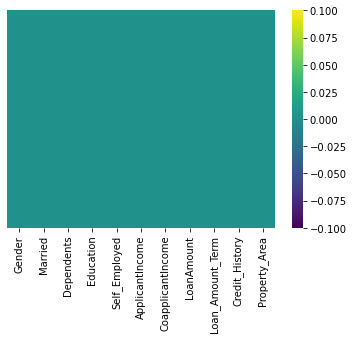

In [172]:
sns.heatmap(df2.isnull(),yticklabels=False, cmap='viridis')

we fixed missing value counts

<AxesSubplot:>

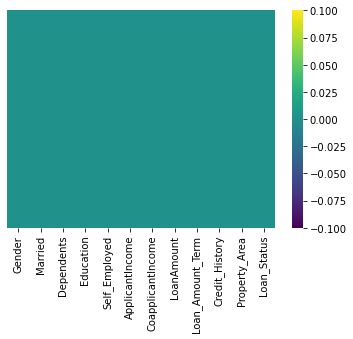

In [173]:
sns.heatmap(df1.isnull(),yticklabels=False, cmap='viridis')

Now we will convert categorical features into numerical features

In [174]:
categorical_feature=[feature for feature in df1.columns if df1[feature].dtypes=='O' ]
categorical_features_2=[feature for feature in df2.columns if df2[feature].dtype=='O']

In [175]:
categorical_feature, categorical_features_2

(['Gender',
  'Married',
  'Dependents',
  'Education',
  'Self_Employed',
  'Property_Area',
  'Loan_Status'],
 ['Gender',
  'Married',
  'Dependents',
  'Education',
  'Self_Employed',
  'Property_Area'])

#now we will convert categorical features into numerical by using label encoder

In [176]:
from sklearn.preprocessing import LabelEncoder
categorical_features_2
# process columns, apply LabelEncoder to categorical features
for c in categorical_features_2:
    lbl = LabelEncoder() 
    lbl.fit(list(df2[c].values)) 
    df2[c] = lbl.transform(list(df2[c].values))

# shape        
print('Shape df2: {}'.format(df2.shape))

Shape df2: (367, 11)


In [177]:
from sklearn.preprocessing import LabelEncoder
categorical_feature
# process columns, apply LabelEncoder to categorical features
for c in categorical_feature:
    lbl = LabelEncoder() 
    lbl.fit(list(df1[c].values)) 
    df1[c] = lbl.transform(list(df1[c].values))

# shape        
print('Shape df1: {}'.format(df1.shape))

Shape df1: (614, 12)


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

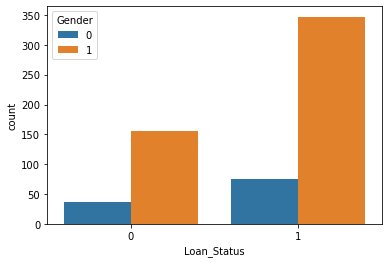

In [178]:
sns.countplot(data=df1, x='Loan_Status', hue='Gender')

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

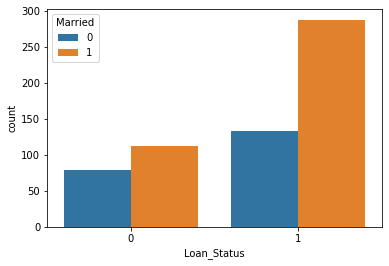

In [179]:
sns.countplot(data=df1, x='Loan_Status', hue='Married')

In [180]:
df2.dtypes, df1.dtypes

(Gender                 int32
 Married                int32
 Dependents             int32
 Education              int32
 Self_Employed          int32
 ApplicantIncome        int64
 CoapplicantIncome      int64
 LoanAmount           float64
 Loan_Amount_Term     float64
 Credit_History       float64
 Property_Area          int32
 dtype: object,
 Gender                 int32
 Married                int32
 Dependents             int32
 Education              int32
 Self_Employed          int32
 ApplicantIncome        int64
 CoapplicantIncome    float64
 LoanAmount           float64
 Loan_Amount_Term     float64
 Credit_History       float64
 Property_Area          int32
 Loan_Status            int32
 dtype: object)

#all values are converted into numeric now we will split the train data into train and test data for training the machine learning model

In [181]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [182]:
X=df1.iloc[:,:-1]
y=df1.iloc[:,-1]

In [183]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2


In [184]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=14)

Let us import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model

In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\GOPINATH V GOWDA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [186]:
pred_test = model.predict(X_test)
pred_train=model.predict(X_train)
accuracy_score_test=accuracy_score(y_test,pred_test)
accuracy_score_train=accuracy_score(y_train,pred_train)

In [187]:
accuracy_score_test

0.827027027027027

In [188]:
accuracy_score_train

0.8041958041958042

In [189]:
#Now the results look preety good

In [190]:
#will check the ML model using Random forest method also

In [195]:
from sklearn.ensemble import RandomForestClassifier
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 5,max_features=10, criterion = 'gini', random_state = 50)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_features=10, n_estimators=5, random_state=50)

In [196]:
pred_test1 = classifier.predict(X_test)
pred_train1=classifier.predict(X_train)
accuracy_score_test1=accuracy_score(y_test,pred_test1)
accuracy_score_train1=accuracy_score(y_train,pred_train1)

In [199]:
df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.000000,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.000000,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.000000,2
3,1,1,2,0,0,2340,2546,100.0,360.0,0.825444,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.000000,2


In [203]:
#getting submission file

In [204]:
sub.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [200]:
y_pred3 = model.predict(df2)

In [213]:
df=pd.DataFrame(y_pred3,columns=['Loan_Status'])

In [216]:
sub['Loan_Status']=df['Loan_Status']
sub.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [217]:
sub['Loan_Status'].value_counts()

1    306
0     61
Name: Loan_Status, dtype: int64

In [218]:
sub['Loan_Status']=sub['Loan_Status'].map({1:'Y',0:'N'})

In [219]:
sub.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [220]:
sub.to_csv('./submission.csv',index=False)

In [222]:
sub.to_csv('G:/Loan analytics/submission.csv',index=False)